In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA, PCA
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
data = pd.read_csv('data.csv')
data.dtypes[data.dtypes == 'int64']
X, y = data.drop(columns=['Bankrupt?']) , data['Bankrupt?']


In [7]:
categorical_columns = [' Net Income Flag'," Liability-Assets Flag"]
numerical_columns = [x for x in X.columns if x not in categorical_columns]

In [8]:


from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps = [
  ('normalize', StandardScaler())
])
normalized = ColumnTransformer(transformers=[
  ('numerical', numerical_transformer,numerical_columns),
  ('categorical','passthrough',categorical_columns)
])
pipeline = Pipeline(steps = [
  ('normalization',normalized),
  ('Dimension red', PCA(n_components=55)),
  ('Classifier', LogisticRegressionCV(cv = 5,random_state=42,))
])
pipeline

Pipeline(steps=[('normalization',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  [' ROA(C) before interest '
                                                   'and depreciation before '
                                                   'interest',
                                                   ' ROA(A) before interest '
                                                   'and % after tax',
                                                   ' ROA(B) before interest '
                                                   'and depreciation after tax',
                                                   ' Operating Gross Margin',
                                                   ' Realized Sales Gross '
                                                   'Margin',
                                                   ' Operating Profit Rate',
                                                   ' Pre-ta...
                                                   ' Operating Profit Growth '
                                                   'Rate',
                                                   ' After-tax Net Profit '
                                                   'Growth Rate',
                                                   ' Regular Net Profit Growth '
                                                   'Rate',
                                                   ' Continuous Net Profit '
                                                   'Growth Rate',
                                                   ' Total Asset Growth Rate',
                                                   ' Net Value Growth Rate', ...]),
                                                 ('categorical', 'passthrough',
                                                  [' Net Income Flag',
                                                   ' Liability-Assets '
                                                   'Flag'])])),
                ('Dimension red', PCA(n_components=55)),
                ('Classifier', LogisticRegressionCV(cv=5, random_state=42))])

In [9]:
transformed = normalized.fit_transform(X)

In [11]:
normalized_df = pd.DataFrame(transformed, columns= X.columns)
normalized_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0,0.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793

In [13]:
coverage = []
for i in range(1,normalized_df.shape[1],5):
  ica= FastICA(n_components=i)
  s=ica.fit_transform(normalized_df)
  coverage.append([i,np.var(s)])

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0, 0.5, 'Number of independent components')

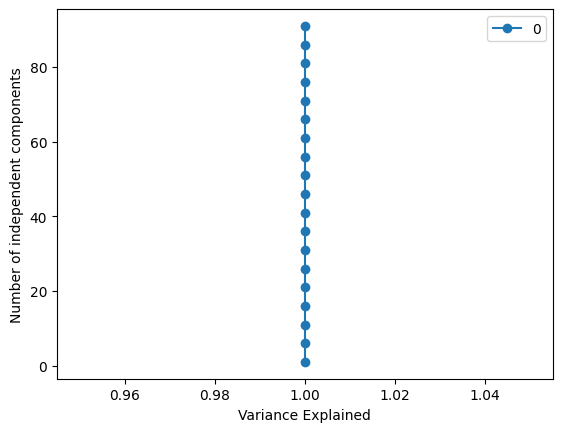

In [14]:
cov = pd.DataFrame(coverage)
cov.plot(kind = 'line',x = 1,y =0, marker='o')
plt.xlabel('Variance Explained')
plt.ylabel('Number of independent components')

In [15]:
#Checking for proper number of components
coverage = []
for i in range(1,normalized_df.shape[1],5):
  pca = PCA(n_components=i)
  pca.fit(normalized_df)
  coverage.append([i,np.sum(pca.explained_variance_ratio_)])
  if np.sum(pca.explained_variance_ratio_)>0.98:
    break


Text(0, 0.5, 'Number of Principal components')

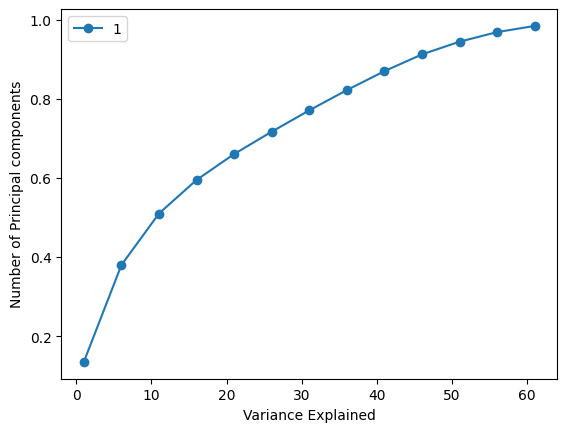

In [16]:
cov = pd.DataFrame(coverage)
cov.plot(kind = 'line',x = 0,y =1, marker='o')
plt.xlabel('Variance Explained')
plt.ylabel('Number of Principal components')

In [17]:
pca = PCA(n_components=52)
reduced_df= pca.fit_transform(normalized_df)
reduced_df.shape


(6819, 52)

In [241]:
coverage = []
for i in range(1,reduced_df.shape[1]):
  ica= FastICA(n_components=i)
  s=ica.fit_transform(reduced_df)
  coverage.append([i,np.var(s)])

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0, 0.5, 'Number of independent components')

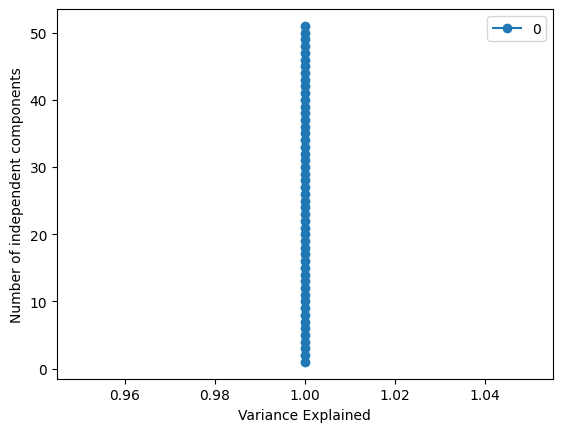

In [242]:
cov = pd.DataFrame(coverage)
cov.plot(kind = 'line',x = 1,y =0, marker='o')
plt.xlabel('Variance Explained')
plt.ylabel('Number of independent components')

In [18]:
# model Selection 
from sklearn.linear_model import LogisticRegressionCV

X_train , X_test, y_train, y_test = train_test_split(reduced_df,y, random_state= 42, test_size=0.2)
clf = LogisticRegressionCV(cv = 5,max_iter=200, scoring='f1')

In [19]:
clf.fit(X_train,y_train)

LogisticRegressionCV(cv=5, max_iter=200)

In [20]:
clf.score(X_test,y_test )

0.9648093841642229

In [246]:
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=42)
clf.fit(train_X,train_y)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

LogisticRegressionCV(cv=5, max_iter=200)

In [247]:
clf.score(test_X, test_y)

0.9612903225806452

In [248]:

from sklearn.linear_model import LogisticRegression

numerical_transformer = Pipeline(steps = [
  ('normalize', StandardScaler())
])
normalized = ColumnTransformer(transformers=[
  ('numerical', numerical_transformer,numerical_columns),
  ('categorical','passthrough',categorical_columns)
])
pipeline = Pipeline(steps = [
  ('normalization',normalized),
  ('Dimension red', PCA(n_components=52)),
  ('Classifier', LogisticRegression())
])

In [249]:
# pipeline.fit(train_X,train_y)
from sklearn.model_selection import GridSearchCV


param_grid = {
    'Classifier__C': [0.1, 1.0, 10.0],  # Example values for the regularization parameter C
    'Classifier__solver': ['liblinear', 'lbfgs']  # Example solvers to try
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

In [250]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalization',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('normalize',
                                                                                          StandardScaler())]),
                                                                         [' '
                                                                          'ROA(C) '
                                                                          'before '
                                                                          'interest '
                                                                          'and '
                                                                          'depreciation '
                                                                          'before '
                                                                          'interest',
                                                                          ' '
                                                                          'ROA(A) '
                                                                          'before '
                                                                          'interest '
                                                                          'and '
                                                                          '% '
                                                                          'after '
                                                                          'tax',
                                                                          ' '
                                                                          'ROA(B) '
                                                                          'before '
                                                                          'interest '
                                                                          'and '
                                                                          'depreciation '
                                                                          'after '
                                                                          'tax',
                                                                          ' '
                                                                          'Operating '
                                                                          'Gross...
                                                                          'Net '
                                                                          'Profit '
                                                                          'Growth '
                                                                          'Rate',
                                                                          ' '
                                                                          'Total '
                                                                          'Asset '
                                                                          'Growth '
                                                                          'Rate',
                                                                          ' '
                                                                          'Net '
                                                                          'Value '
                                                                          'Growth '
                                                                          'Rate', ...]),
                                                                        ('categorical',
                                                                         'passthrough',
                                               

In [251]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate best estimator on test data
accuracy = best_estimator.score(test_X, test_y)

# Print results
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'Classifier__C': 1.0, 'Classifier__solver': 'lbfgs'}
Accuracy on Test Set: 0.9683284457478006


In [252]:
from sklearn.model_selection import cross_val_score


p1=cross_val_score(best_estimator,test_X, test_y, scoring = 'f1').mean()
p2=cross_val_score(best_estimator,test_X, test_y, scoring = 'recall').mean()
p3=cross_val_score(best_estimator,test_X, test_y, scoring = 'precision').mean()
print(f'F1 score = {p1}\nRecall = {p2}\nPrecision = {p3}')

F1 score = 0.23352941176470585
Recall = 0.1893939393939394
Precision = 0.33571428571428574


In [254]:
data = pd.read_csv('data.csv')


In [255]:
corr=data.drop(columns=categorical_columns + ['Bankrupt?']).corr()


In [256]:
corr_pair = []
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
    if i!=j and corr.iloc[i,j] !=1.0:
      corr_pair.append((corr.index[i],corr.index[j],abs(corr.iloc[i,j])))

      
      

In [257]:
corr_pair
corr_pair.sort(key = lambda x: x[2], reverse=True)

In [258]:
pair_df = pd.DataFrame(corr_pair)
pair_df.iloc[0].iloc[2]

0.9999999999999993

In [259]:
df =pair_df[pair_df[2]>0.45]
df


,0,1,2
0,Debt ratio %,Net worth/Assets,1.000000
1,Net worth/Assets,Debt ratio %,1.000000
2,Operating Gross Margin,Gross Profit to Sales,1.000000
3,Gross Profit to Sales,Operating Gross Margin,1.000000
4,Net Value Per Share (A),Net Value Per Share (C),0.999837
...,...,...,...
321,Net Worth Turnover Rate (times),Inventory and accounts receivable/Net value,0.453424
322,Inventory and accounts receivable/Net value,Current Liability to Assets,0.452321
323,Current Liability to Assets,Inventory and accounts receivable/Net value,0.452321
324,Borrowing dependency,Contingent liabilities/Net worth,0.451737


In [260]:
df = df[: : 2]

In [261]:

pair1 = df.iloc[: ,0]
pair2 = df.iloc[:,1]
df

,0,1,2
0,Debt ratio %,Net worth/Assets,1.000000
2,Operating Gross Margin,Gross Profit to Sales,1.000000
4,Net Value Per Share (A),Net Value Per Share (C),0.999837
6,Operating Gross Margin,Realized Sales Gross Margin,0.999518
8,Realized Sales Gross Margin,Gross Profit to Sales,0.999518
...,...,...,...
316,Average Collection Days,Total income/Total expense,0.459146
318,Persistent EPS in the Last Four Seasons,Cash Flow Per Share,0.455794
320,Inventory and accounts receivable/Net value,Net Worth Turnover Rate (times),0.453424
322,Inventory and accounts receivable/Net value,Current Liability to Assets,0.452321


In [262]:
i = set(pair1)-set(pair2)
j = set(pair2)-set(pair1)
redundant =list(set(pair1))
redundant

[' Working capitcal Turnover Rate',
 ' Net Value Per Share (B)',
 ' Working Capital/Equity',
 ' Cash/Total Assets',
 ' Cash flow rate',
 ' Operating Profit Growth Rate',
 ' Operating Funds to Liability',
 ' Operating profit/Paid-in capital',
 ' Realized Sales Gross Margin',
 ' Cash Reinvestment %',
 ' Persistent EPS in the Last Four Seasons',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Per Share (A)',
 ' Debt ratio %',
 ' ROA(B) before interest and depreciation after tax',
 ' After-tax Net Profit Growth Rate',
 " Net Income to Stockholder's Equity",
 ' Current Liabilities/Equity',
 ' Quick Assets/Total Assets',
 ' After-tax net Interest Rate',
 ' Borrowing dependency',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Net Value Per Share (C)',
 ' Pre-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Contingent liabilities/Net worth',
 ' Working Capital to Total Assets',
 ' Total Asset Turnover',
 ' Current Asset

In [263]:
j

{' CFO to Assets',
 ' Cash Flow to Equity',
 ' Cash Flow to Liability',
 ' Cash Flow to Sales',
 ' Continuous interest rate (after tax)',
 ' Current Liability to Current Assets',
 ' Equity to Liability',
 ' Gross Profit to Sales',
 ' Net Income to Total Assets',
 ' Regular Net Profit Growth Rate',
 ' Total income/Total expense'}

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
check = data[numerical_columns]
check = check.drop(columns = redundant)
check

,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Accounts Receivable Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Total income/Total expense,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.780985,1.256969e-04,0.000000e+00,7.250725e-04,0.000000,0.017560,0.022102,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.002259,0.001208,0.629951,0.021266,0.005024,0.001814,1.820926e-04,1.165007e-04,0.034164,0.392913,0.037135,0.001997,1.473360e-04,0.276920,0.001036,2.559237e-02,0.002022,7.010000e+08,6.550000e+09,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.458609,0.520382,0.312905,0.118250,0.716845,0.009219,0.622879,0.601453,0.026601,0.564050,0.016469
1,0.781506,2.897851e-04,0.000000e+00,6.470647e-04,0.000000,0.021144,0.022080,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.006016,0.004039,0.635172,0.012502,0.005059,0.001286,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.004136,1.383910e-03,0.289642,0.005210,2.394682e-02,0.002226,1.065198e-04,7.700000e+09,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.459001,0.567101,0.314163,0.047775,0.795297,0.008323,0.623652,0.610237,0.264577,0.570175,0.020794
2,0.780284,2.361297e-04,2.550000e+07,7.900790e-04,0.000000,0.005944,0.022760,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.011543,0.005348,0.629631,0.021248,0.005100,0.001495,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.006302,5.340000e+09,0.277456,0.013879,3.715116e-03,0.002060,1.791094e-03,1.022676e-03,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.459254,0.538491,0.314515,0.025346,0.774670,0.040003,0.623841,0.601449,0.026555,0.563706,0.016474
3,0.781241,1.078888e-04,0.000000e+00,4.490449e-04,0.000000,0.014368,0.022046,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.004194,0.002896,0.630228,0.009572,0.005047,0.001966,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.002961,1.010646e-03,0.276580,0.003540,2.216520e-02,0.001831,8.140000e+09,6.050000e+09,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.448518,0.604105,0.302382,0.067250,0.739555,0.003252,0.622929,0.583538,0.026697,0.564663,0.023982
4,0.781550,7.890000e+09,0.000000e+00,6.860686e-04,0.000000,0.029690,0.022096,0.689697,0.217626,5.510000e+09,0.000439,0.265218,0.006022,0.003727,0.636055,0.005150,0.005303,0.001449,1.633674e-04,2.935211e-04,0.058111,0.394371,0.023988,0.004275,6.804636e-04,0.287913,0.004869,0.000000e+00,0.002224,6.680000e+09,5.050000e+09,8.240000e+08,0.671563,0.309555,0.975007,0.330726,0.454411,0.578469,0.311567,0.047725,0.795016,0.003878,0.623521,0.598782,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.781588,1.510213e-04,4.500000e+09,1.790179e-04,0.113372,0.020766,0.022374,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.010451,0.005457,0.631415,0.006655,0.005150,0.0006

In [265]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['Vif']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [266]:
vif = calc_vif(check)


In [267]:
vif


,variables,Vif
0,Continuous interest rate (after tax),1.000627
1,Operating Expense Rate,1.148010
2,Research and development expense rate,1.046222
3,Interest-bearing debt interest rate,1.011420
4,Tax rate (A),1.090398
5,Revenue Per Share (Yuan ¥),1.349858
6,Realized Sales Gross Profit Growth Rate,1.005517
7,Regular Net Profit Growth Rate,1.023192
8,Continuous Net Profit Growth Rate,1.009161
9,Total Asset Growth Rate,1.042143


In [268]:
original_vif = calc_vif(data[numerical_columns])

In [269]:
original_vif

,variables,Vif
0,ROA(C) before interest and depreciation befor...,6.901849e+01
1,ROA(A) before interest and % after tax,4.359547e+01
2,ROA(B) before interest and depreciation after...,1.028945e+02
3,Operating Gross Margin,6.334540e+07
4,Realized Sales Gross Margin,1.076293e+03
...,...,...
88,Net Income to Stockholder's Equity,8.349080e+00
89,Liability to Equity,4.649450e+02
90,Degree of Financial Leverage (DFL),1.004899e+00
91,Interest Coverage Ratio (Interest expense to ...,1.006981e+00


In [270]:
numerical_columns = vif['variables'].tolist()
numerical_columns
all_columns = numerical_columns + categorical_columns

In [271]:
train_X, test_X, train_y, test_y = train_test_split(X[all_columns],y, random_state=43)
train_X

,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Accounts Receivable Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Total income/Total expense,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Net Income Flag,Liability-Assets Flag
3002,0.781157,2.649232e-04,5.200000e+09,0.000755,0.000000,0.007880,0.022049,0.689408,0.217594,6.970000e+09,0.000475,0.264102,0.007080,0.003141,0.628785,0.009368,0.005154,0.000501,2.730000e+09,6.510000e+09,0.010326,0.386988,0.020388,0.004032,0.003276,0.278371,0.008223,0.004272,0.002030,4.244772e-04,2.518771e-04,1.823300e-04,0.671627,0.362881,0.786604,0.332810,0.464325,0.527964,0.320167,0.040851,0.767707,2.334514e-03,0.623334,0.600611,0.026395,0.562134,0.024278,1,0
6789,0.780631,4.110877e-04,1.657105e-04,0.000265,0.000000,0.011253,0.022052,0.688413,0.217480,6.170000e+09,0.000403,0.261595,0.030997,0.029833,0.630560,0.005182,0.008235,0.000274,1.425214e-03,7.822187e-04,0.023092,0.375048,0.003770,0.030707,0.031278,0.276983,0.001095,0.003748,0.001998,4.070686e-04,4.262947e-04,3.943424e-04,0.671629,0.060374,0.490669,0.328511,0.473926,0.563075,0.323657,0.009404,0.665514,2.976919e-04,0.624243,0.605227,0.026774,0.565077,0.035334,1,0
38,0.781573,1.102016e-04,8.490000e+08,0.000793,0.000000,0.025198,0.022095,0.690047,0.217648,6.050000e+09,0.000448,0.264065,0.019166,0.011514,0.633241,0.004359,0.005269,0.001187,1.209492e-04,1.868549e-04,0.026544,0.393241,0.017902,0.011775,0.007846,0.277260,0.019426,0.009957,0.002247,9.030000e+09,5.800000e+09,3.970000e+09,0.671567,0.408581,0.355820,0.327619,0.456560,0.585809,0.313143,0.015304,0.798174,4.593395e-03,0.623962,0.600876,0.029088,0.568609,0.039935,1,0
1176,0.781286,8.270000e+09,0.000000e+00,0.000780,0.000000,0.016879,0.021971,0.656621,0.211960,5.830000e+09,0.000404,0.263436,0.007451,0.001017,0.628257,0.012833,0.005080,0.001530,2.080000e+09,6.960000e+09,0.047145,0.383788,0.086678,0.001560,0.000572,0.278969,0.015562,0.010365,0.001982,3.380153e-04,7.250000e+09,2.430000e+09,0.671576,0.458432,0.707643,0.334342,0.459642,0.570926,0.315123,0.038878,0.769694,1.344792e-02,0.619463,0.595002,0.026426,0.562495,0.020525,1,0
1219,0.781670,3.750000e+09,0.000000e+00,0.000578,0.306205,0.012054,0.022167,0.689246,0.217588,5.730000e+09,0.000420,0.263713,0.014462,0.008618,0.631224,0.002686,0.005162,0.001049,8.960000e+08,1.036402e-04,0.031253,0.404514,0.039938,0.008620,0.004776,0.277326,0.015431,0.001127,0.002394,1.189203e-04,7.380000e+09,4.050000e+09,0.671580,0.498760,0.545219,0.327542,0.462513,0.614016,0.315632,0.020275,0.805284,4.957800e-03,0.623443,0.602957,0.026943,0.565792,0.057553,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,0.781764,1.484773e-04,3.550000e+09,0.000134,0.249519,0.057156,0.022110,0.689418,0.217596,7.510000e+09,0.000463,0.264023,0.010502,0.00964

In [286]:

param_grid = {
    'Classifier__C': [0.1, 1.0, 10.0],  # Example values for the regularization parameter C
    'Classifier__solver': ['liblinear', 'lbfgs']  # Example solvers to try
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

In [294]:
numerical_transformer = Pipeline(steps = [
  ('normalize', StandardScaler())
])
normalized = ColumnTransformer(transformers=[
  ('numerical', numerical_transformer,numerical_columns),
  ('categorical','passthrough',categorical_columns)
])
pipeline = Pipeline(steps = [
  ('normalization',normalized),
  ('Dimension red', PCA(n_components=47)),
  ('Classifier', LogisticRegression(solver='liblinear'))
])

In [295]:
pipeline.fit(train_X,train_y)

Pipeline(steps=[('normalization',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  [' Continuous interest rate '
                                                   '(after tax)',
                                                   ' Operating Expense Rate',
                                                   ' Research and development '
                                                   'expense rate',
                                                   ' Interest-bearing debt '
                                                   'interest rate',
                                                   ' Tax rate (A)',
                                                   ' Revenue Per Share (Yuan '
                                                   '¥)',
                                                   ' Realized Sales Gross '
                                                   'Profit Growth Rate',
                                                   ' Regular...
                                                   ' Cash/Current Liability',
                                                   ' Inventory/Working Capital',
                                                   ' Inventory/Current '
                                                   'Liability',
                                                   ' Long-term Liability to '
                                                   'Current Assets',
                                                   ' Total income/Total '
                                                   'expense',
                                                   ' Current Asset Turnover '
                                                   'Rate', ...]),
                                                 ('categorical', 'passthrough',
                                                  [' Net Income Flag',
                                                   ' Liability-Assets '
                                                   'Flag'])])),
                ('Dimension red', PCA(n_components=47)),
                ('Classifier', LogisticRegression(solver='liblinear'))])

In [306]:
cross_val_score(pipeline, test_X, test_y, scoring = 'precision').mean()

0.4533333333333334

In [287]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalization',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('normalize',
                                                                                          StandardScaler())]),
                                                                         [' '
                                                                          'Continuous '
                                                                          'interest '
                                                                          'rate '
                                                                          '(after '
                                                                          'tax)',
                                                                          ' '
                                                                          'Operating '
                                                                          'Expense '
                                                                          'Rate',
                                                                          ' '
                                                                          'Research '
                                                                          'and '
                                                                          'development '
                                                                          'expense '
                                                                          'rate',
                                                                          ' '
                                                                          'Interest-bearing '
                                                                          'debt '
                                                                          'interest '
                                                                          'rate',
                                                                          ' '
                                                                          'Tax '
                                                                          'rate '
                                                                          '(A)',
                                                                          ' '
                                                                          'Revenue '
                                                                          '...
                                                                          'Current '
                                                                          'Assets',
                                                                          ' '
                                                                          'Total '
                                                                          'income/Total '
                                                                          'expense',
                                                                          ' '
                                                                          'Current '
                                                                          'Asset '
                                                                          'Turnover '
                                                                          'Rate', ...]),
                                                                        ('categorical',
                                                                         'passthrough',
                                                                         [' '
                                                                          'Net '
                                            

In [289]:
grid_search.best_params_

{'Classifier__C': 1.0, 'Classifier__solver': 'liblinear'}

In [292]:
f1 = cross_val_score(pipeline, test_X, test_y, scoring = 'f1').mean()
precision = cross_val_score(pipeline, test_X, test_y, scoring = 'precision').mean()
recall = cross_val_score(pipeline, test_X, test_y, scoring = 'recall').mean()

In [293]:
print(f'f1 = {f1}\nprecision = {precision}\nrecall = {recall}')

f1 = 0.3489177489177489
precision = 0.5333333333333334
recall = 0.2611111111111111
